In [7]:
import pretty_midi
import os
import seaborn as sns
import matplotlib.pyplot as plt # For plotting
import numpy as np

In [8]:
os.getcwd()

'/Users/meilinlyu/Documents/An Imperial Experience/Research/LoadMIDI/Script'

In [9]:
directory = "../Data/melody"

# get list of all files (excluding subdirectories)
file_list = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]

# print the number of files
print(f"Number of files in the directory: {len(file_list)}")

Number of files in the directory: 1034


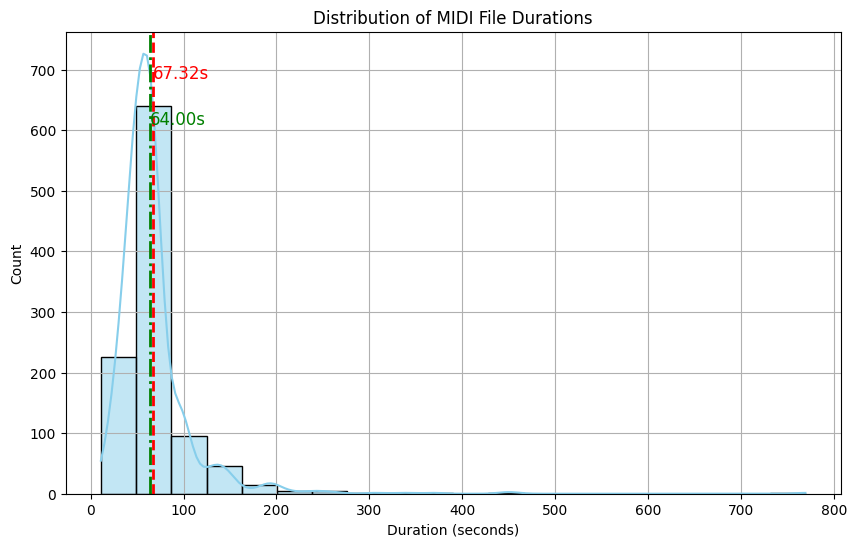

In [10]:
midi_files = [f for f in os.listdir(directory) if f.lower().endswith(('.mid', '.midi'))]

# Initialize list to store durations
durations = []

# Loop over MIDI files and get their durations
for midi_file in midi_files:
    try:
        midi_path = os.path.join(directory, midi_file)
        midi_data = pretty_midi.PrettyMIDI(midi_path)
        durations.append(midi_data.get_end_time())
    except Exception as e:
        print(f"Error reading {midi_file}: {e}")

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(durations, bins=20, kde=True, color='skyblue')
plt.axvline(np.mean(durations), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(durations):.2f}s')
plt.axvline(np.median(durations), color='green', linestyle='-.', linewidth=2, label=f'Median: {np.median(durations):.2f}s')
plt.title('Distribution of MIDI File Durations')
plt.text(np.mean(durations) + 0.1, plt.ylim()[1]*0.9, f'{np.mean(durations):.2f}s', color='red', fontsize=12)
plt.text(np.median(durations) + 0.1, plt.ylim()[1]*0.8, f'{np.median(durations):.2f}s', color='green', fontsize=12)
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.grid(True)
plt.show()



In [17]:
midi = pretty_midi.PrettyMIDI('../Data/melody/ashover11.mid')
#midi score

In [18]:
midi.

In [12]:
print(f"Duration: {midi.get_end_time():.2f} seconds")
# number of time units representing a quarter note
print(f"Resolution (ticks per quarter note): {midi.resolution}")

Duration: 49.50 seconds
Resolution (ticks per quarter note): 1024


In [13]:
tempo_changes_times, tempo_changes_bpm = midi.get_tempo_changes()
print(f"Tempo change times (seconds): {tempo_changes_times}")
print(f"Tempo change BPMs: {tempo_changes_bpm}")

Tempo change times (seconds): [0.]
Tempo change BPMs: [120.]


In [14]:
print(f"Number of instruments: {len(midi.instruments)}")

for i, instrument in enumerate(midi.instruments):
    # Instrument Name:
    print(f"\nInstrument #{i}: {instrument.name}")

    # Program Number (MIDI program/patch, e.g., 0 for Acoustic Grand Piano)
    print(f"  Program: {instrument.program}")

    # Is it a drum track?
    print(f"  Is drum: {instrument.is_drum}")

    # Number of notes in this instrument
    print(f"  Number of notes: {len(instrument.notes)}")

Number of instruments: 1

Instrument #0: 
  Program: 0
  Is drum: False
  Number of notes: 169


In [15]:
for i, instrument in enumerate(midi.instruments):
    print(f"\n--- Notes for Instrument #{i}: {instrument.name} ---")
    if instrument.is_drum:
        print("  (This is a drum track, pitch numbers map to drum sounds)")

    for note in instrument.notes:
        # Note Attributes:
        # - note.start: Start time of the note in seconds
        # - note.end: End time of the note in seconds
        # - note.pitch: MIDI note number (0-127). 60 is Middle C.
        # - note.velocity: MIDI velocity (0-127), how "hard" the note was played.
        print(f"  Pitch: {note.pitch}, Start: {note.start:.2f}s, End: {note.end:.2f}s, Duration: {note.end - note.start:.2f}s, Velocity: {note.velocity}")

        # You can also convert MIDI pitch to a note name (requires `pretty_midi.utilities`)
        note_name = pretty_midi.note_number_to_name(note.pitch)
        print(f"    Note Name: {note_name}")


--- Notes for Instrument #0:  ---
  Pitch: 76, Start: 1.25s, End: 1.50s, Duration: 0.25s, Velocity: 90
    Note Name: E5
  Pitch: 74, Start: 1.50s, End: 1.75s, Duration: 0.25s, Velocity: 90
    Note Name: D5
  Pitch: 73, Start: 1.75s, End: 2.00s, Duration: 0.25s, Velocity: 90
    Note Name: C#5
  Pitch: 74, Start: 2.00s, End: 2.25s, Duration: 0.25s, Velocity: 90
    Note Name: D5
  Pitch: 66, Start: 2.25s, End: 2.50s, Duration: 0.25s, Velocity: 90
    Note Name: F#4
  Pitch: 69, Start: 2.50s, End: 2.75s, Duration: 0.25s, Velocity: 90
    Note Name: A4
  Pitch: 71, Start: 2.75s, End: 3.00s, Duration: 0.25s, Velocity: 90
    Note Name: B4
  Pitch: 74, Start: 3.00s, End: 3.25s, Duration: 0.25s, Velocity: 90
    Note Name: D5
  Pitch: 73, Start: 3.25s, End: 3.50s, Duration: 0.25s, Velocity: 90
    Note Name: C#5
  Pitch: 74, Start: 3.50s, End: 3.75s, Duration: 0.25s, Velocity: 90
    Note Name: D5
  Pitch: 71, Start: 3.75s, End: 4.00s, Duration: 0.25s, Velocity: 90
    Note Name: B4
  Pit


Piano roll shape for : (128, 4950)


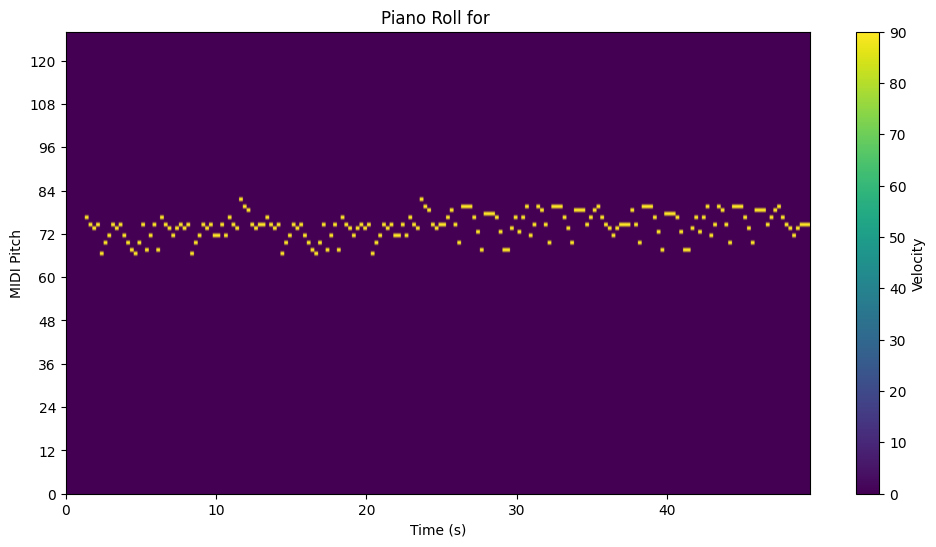

In [16]:
import matplotlib.pyplot as plt # For plotting
import numpy as np

# Choose an instrument (e.g., the first one)
if midi.instruments:
    instrument_to_plot = midi.instruments[0]
    fs = 100 # Sampling frequency for the piano roll (samples per second)
    piano_roll = instrument_to_plot.get_piano_roll(fs=fs)

    print(f"\nPiano roll shape for {instrument_to_plot.name}: {piano_roll.shape}") # (pitch, time_frames)

    # You can then visualize it (optional, requires matplotlib)
    if piano_roll.shape[1] > 0: # Check if there's actual data to plot
        plt.figure(figsize=(12, 6))
        plt.imshow(piano_roll, aspect='auto', origin='lower', cmap='viridis',
                   extent=[0, piano_roll.shape[1]/fs, 0, 128]) # Time in seconds on x-axis
        plt.xlabel("Time (s)")
        plt.ylabel("MIDI Pitch")
        plt.title(f"Piano Roll for {instrument_to_plot.name}")
        plt.yticks(np.arange(0, 129, 12)) # Label every octave
        plt.colorbar(label="Velocity")
        plt.show()
    else:
        print(f"No note data to plot for {instrument_to_plot.name}.")
else:
    print("No instruments found in the MIDI file to generate a piano roll.")

# Get a piano roll for the entire MIDI file (all instruments)
# fs = 100
# full_piano_roll = midi_data.get_piano_roll(fs=fs)
# print(f"\nFull piano roll shape: {full_piano_roll.shape}")
# if full_piano_roll.shape[1] > 0:
#     plt.figure(figsize=(12, 6))
#     plt.imshow(full_piano_roll, aspect='auto', origin='lower', cmap='viridis',
#                extent=[0, full_piano_roll.shape[1]/fs, 0, 128])
#     plt.xlabel("Time (s)")
#     plt.ylabel("MIDI Pitch")
#     plt.title("Piano Roll for Entire MIDI File")
#     plt.yticks(np.arange(0, 129, 12))
#     plt.colorbar(label="Velocity")
#     plt.show()
# else:
#     print("No note data in the MIDI file to generate a full piano roll.")